## What is Feature Scaling

Feature scaling is a method used in data pre-processing for machine learning and data
science that involves scaling the range of variables or features of data. 

__The goal of feature
scaling is to normalize the range of independent variables or features of data within a
specific range, such as between -1 and 1 or 0 and 1, or to standardize the features to have a
mean of 0 and a standard deviation of 1.__


This process is important because features on
different scales can distort the distance between data points in some algorithms and can
also affect the performance of algorithms negatively.

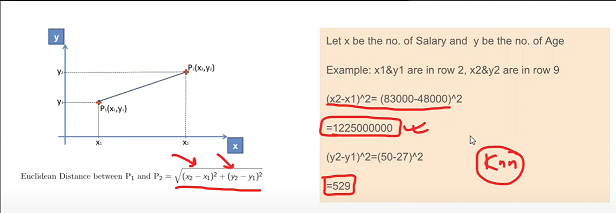

### Why do we need feature scaling?

1. Improves the performance of Distance based algorithms
2. Improves in optimization techniques
3. Deep Learning (Numerical Stability)

### Which algorithms are affected if the features are not scaled?

1. Gradient Descent based algorithms
    - a. Linear Regression
    - b. Logistic Regression
    - c. Neural Network


2. SVM


3. Distance based algorithms
    - a. KNN
    - b. K-Means


4. Dimensionality Reduction Techniques
    - a. PCA
    - b. LDA



5. Regularization Techniques
    - a. Ridge Regression
    - b. Lasso Regression

### Which algorithms are not affected?

1. Tree Based Algorithms
    - a. CART
    - b. Random Forest
    - c. Adaboost
    - d. Gradient Boosting
    - e. XGBoost


2. Naive Bayes

### Types of feature Scaling :

1. Standardization: Standard Scaler


2. Normalization:

    - Min Max Scaler

    - Robust Scaler (works better on outliers)
    
    - Max Absolute Scaler
    
    - L2 and L1 Regularization 

# 1. Standardization - Standard Scaler

“Standardizing” a vector most often means subtracting a measure of location and dividing by a measure of scale. 


For example, if the vector contains random values with a Gaussian distribution, you might subtract the mean and divide by the standard deviation, thereby obtaining a “standard normal” random variable with mean 0 and standard deviation 1.

It is also known as Z-Score Normalization.


- First we do mean centering

- Then scaling by the factor of Standard deviation

$$ x_{i}^{'}\;=\;\frac{x_{i}-\bar x}{\sigma} $$


with mean $\;\mu$ = 0 and sigma $\;\sigma$ = 1 for all values of $x_{i}^{'}$

#### mean centering: bringing mean of both columns to zero and then shrinking both columns and converting std dev to be 1
<br></br>
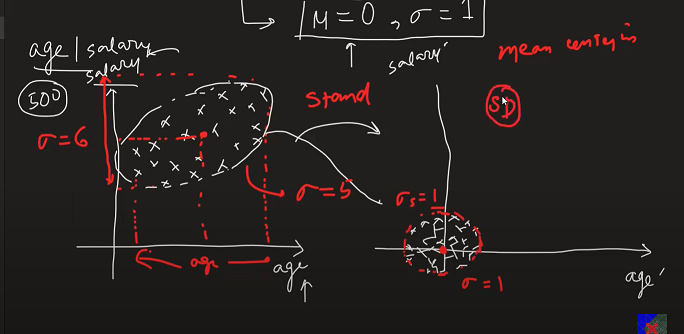

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Generating elongated ellipsoid data
np.random.seed(42)

#### when covariance between both variables is 0 :

In [3]:
# Generate data
mean = [0, 0]
cov = [[10, 0], [0, 1]]  # Covariance matrix to create elongation

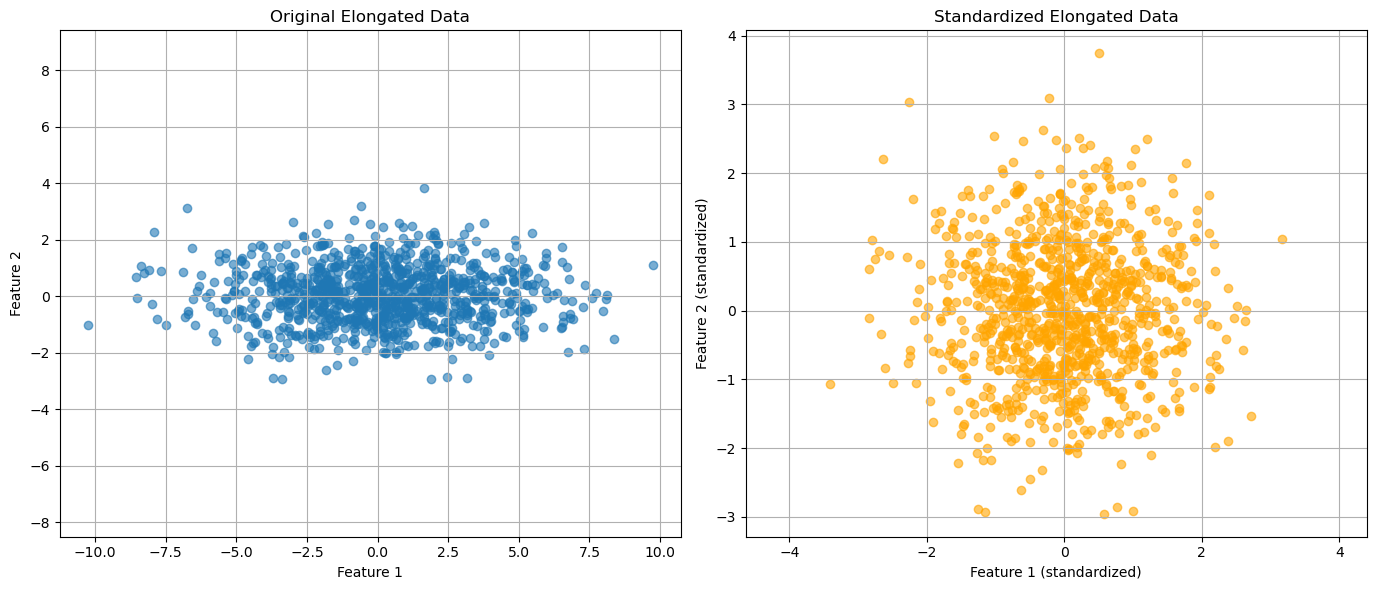

In [4]:
# Create an elongated ellipsoid dataset
elongated_data = np.random.multivariate_normal(mean, cov, 1000)

# Apply standardization
scaler_elongated = StandardScaler()
elongated_data_standardized = scaler_elongated.fit_transform(elongated_data)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original Elongated Data
ax[0].scatter(elongated_data[:, 0], elongated_data[:, 1], alpha=0.6)
ax[0].set_title('Original Elongated Data')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].axis('equal')  # Ensuring equal axis ratios
ax[0].grid(True)

# Standardized Elongated Data
ax[1].scatter(elongated_data_standardized[:, 0], elongated_data_standardized[:, 1], alpha=0.6, color='orange')
ax[1].set_title('Standardized Elongated Data')
ax[1].set_xlabel('Feature 1 (standardized)')
ax[1].set_ylabel('Feature 2 (standardized)')
ax[1].axis('equal')  # Ensuring equal axis ratios
ax[1].grid(True)

plt.tight_layout()
plt.show()

After standardization the data became mean centric and became circular in shape. ***Hence variance became equal for both axis.***

In [5]:
elong_data = pd.DataFrame(elongated_data)
np.round(elong_data.describe(),2)

0       1
count  1000.0  1000.0
mean      0.1     0.1
std       3.0     1.0
min     -10.2    -2.9
25%      -1.9    -0.7
50%       0.1     0.0
75%       2.1     0.7
max       9.7     3.9

In [6]:
elong_data_standard = pd.DataFrame(elongated_data_standardized)
np.round(elong_data_standard.describe(),2)

0       1
count  1000.0  1000.0
mean     -0.0    -0.0
std       1.0     1.0
min      -3.4    -3.0
25%      -0.7    -0.7
50%       0.0    -0.0
75%       0.6     0.6
max       3.2     3.7

In [7]:
covariance_value = np.cov(elong_data.iloc[:,0],elong_data.iloc[:,1])[0,1]  # Covariance between column 0 and column 1
print("Covariance before scaling :", covariance_value)

print()

covariance_value = np.cov(elong_data_standard.iloc[:,0],elong_data_standard.iloc[:,1])[0,1]  # Covariance between column 0 and column 1
print("Covariance after scaling :", covariance_value)

Covariance before scaling : 0.007975584158805737

Covariance after scaling : 0.0025867379011268337


#### Now, when covariance between both variables is 2 and is positively correlated :

In [8]:
# Generate data
mean = [0, 0]
cov = [[10, 2], [2, 1]]  # Covariance matrix to create elongation

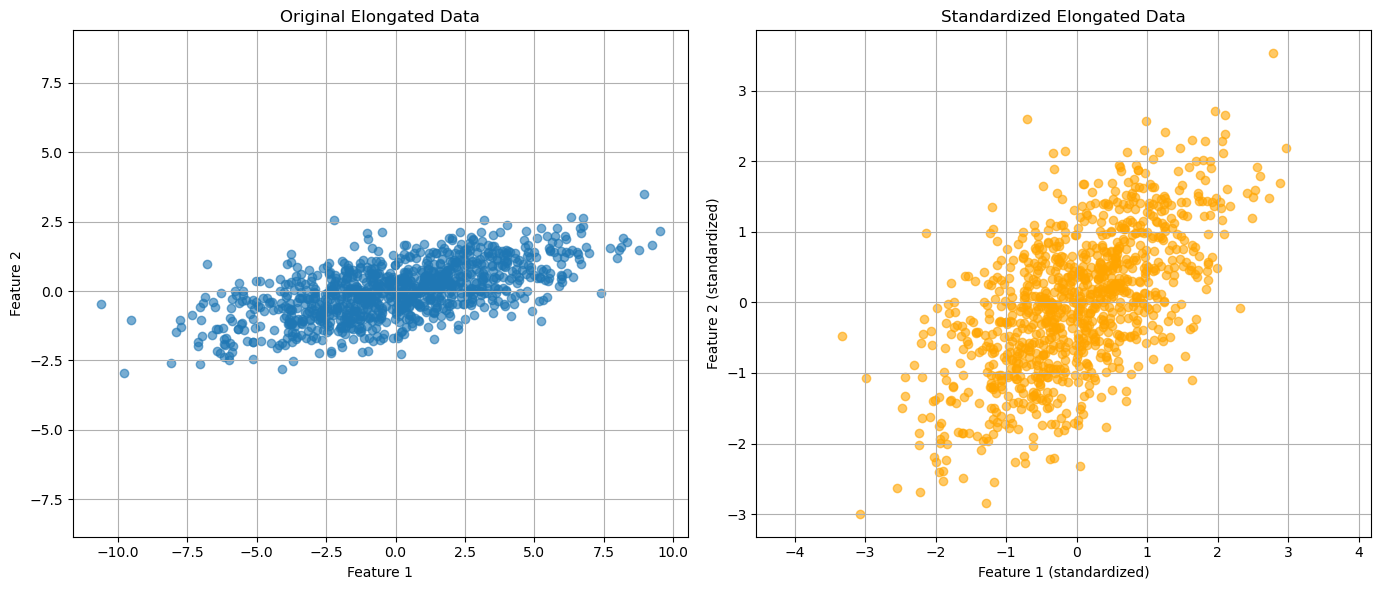

In [9]:
# Create an elongated ellipsoid dataset
elongated_data = np.random.multivariate_normal(mean, cov, 1000)

# Apply standardization
scaler_elongated = StandardScaler()
elongated_data_standardized = scaler_elongated.fit_transform(elongated_data)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original Elongated Data
ax[0].scatter(elongated_data[:, 0], elongated_data[:, 1], alpha=0.6)
ax[0].set_title('Original Elongated Data')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].axis('equal')  # Ensuring equal axis ratios
ax[0].grid(True)

# Standardized Elongated Data
ax[1].scatter(elongated_data_standardized[:, 0], elongated_data_standardized[:, 1], alpha=0.6, color='orange')
ax[1].set_title('Standardized Elongated Data')
ax[1].set_xlabel('Feature 1 (standardized)')
ax[1].set_ylabel('Feature 2 (standardized)')
ax[1].axis('equal')  # Ensuring equal axis ratios
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [10]:
elong_data = pd.DataFrame(elongated_data)
np.round(elong_data.describe(),2)

0       1
count  1000.0  1000.0
mean      0.0     0.0
std       3.2     1.0
min     -10.6    -2.9
25%      -2.0    -0.6
50%       0.1     0.0
75%       2.2     0.6
max       9.5     3.5

In [11]:
elong_data_standard = pd.DataFrame(elongated_data_standardized)
np.round(elong_data_standard.describe(),2)

0       1
count  1000.0  1000.0
mean      0.0    -0.0
std       1.0     1.0
min      -3.3    -3.0
25%      -0.7    -0.7
50%       0.0     0.0
75%       0.7     0.6
max       3.0     3.5

In [12]:
covariance_value = np.cov(elong_data.iloc[:,0],elong_data.iloc[:,1])[0,1]  # Covariance between column 0 and column 1
print("Covariance before scaling :", covariance_value)

print()

covariance_value = np.cov(elong_data_standard.iloc[:,0],elong_data_standard.iloc[:,1])[0,1]  # Covariance between column 0 and column 1
print("Covariance after scaling :", covariance_value)

Covariance before scaling : 1.9485654385373499

Covariance after scaling : 0.6191826047579472


#### Now, when covariance between both variables is 5 and is positively correlated :

In [13]:
# Generate data
mean = [0, 0]
cov = [[10, 5], [5, 1]]  # Covariance matrix to create elongation

C:\Users\Asus\AppData\Local\Temp\ipykernel_18756\3591415522.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  elongated_data = np.random.multivariate_normal(mean, cov, 1000)


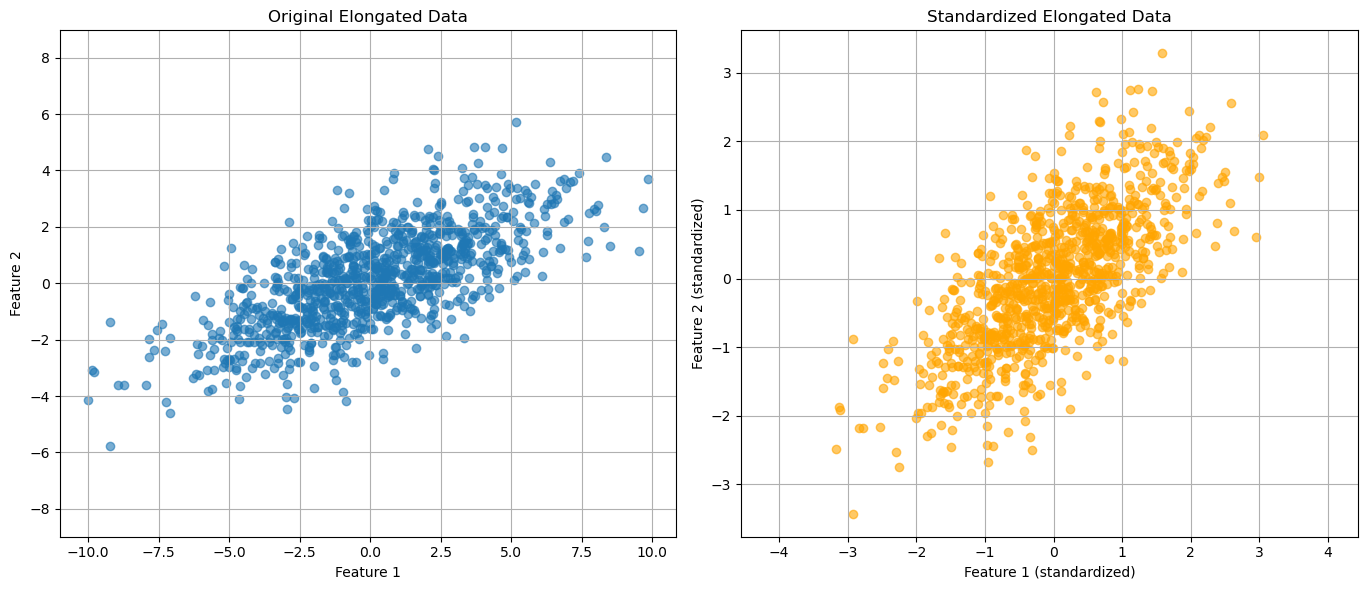

In [14]:
# Create an elongated ellipsoid dataset
elongated_data = np.random.multivariate_normal(mean, cov, 1000)

# Apply standardization
scaler_elongated = StandardScaler()
elongated_data_standardized = scaler_elongated.fit_transform(elongated_data)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original Elongated Data
ax[0].scatter(elongated_data[:, 0], elongated_data[:, 1], alpha=0.6)
ax[0].set_title('Original Elongated Data')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].axis('equal')  # Ensuring equal axis ratios
ax[0].grid(True)

# Standardized Elongated Data
ax[1].scatter(elongated_data_standardized[:, 0], elongated_data_standardized[:, 1], alpha=0.6, color='orange')
ax[1].set_title('Standardized Elongated Data')
ax[1].set_xlabel('Feature 1 (standardized)')
ax[1].set_ylabel('Feature 2 (standardized)')
ax[1].axis('equal')  # Ensuring equal axis ratios
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [15]:
elong_data = pd.DataFrame(elongated_data)
np.round(elong_data.describe(),2)

0        1
count  1000.00  1000.00
mean      0.11     0.11
std       3.19     1.71
min     -10.01    -5.75
25%      -2.05    -1.08
50%       0.14     0.13
75%       2.25     1.24
max       9.86     5.74

In [16]:
elong_data_standard = pd.DataFrame(elongated_data_standardized)
np.round(elong_data_standard.describe(),2)

0        1
count  1000.00  1000.00
mean      0.00     0.00
std       1.00     1.00
min      -3.17    -3.43
25%      -0.68    -0.70
50%       0.01     0.01
75%       0.67     0.66
max       3.06     3.28

In [17]:
covariance_value = np.cov(elong_data.iloc[:,0],elong_data.iloc[:,1])[0,1]  # Covariance between column 0 and column 1
print("Covariance before scaling :", covariance_value)

print()

covariance_value = np.cov(elong_data_standard.iloc[:,0],elong_data_standard.iloc[:,1])[0,1]  # Covariance between column 0 and column 1
print("Covariance after scaling :", covariance_value)

Covariance before scaling : 3.8640686953682266

Covariance after scaling : 0.7073729423556664


### NOTE : 

__It is not necessary that after standardisation the data will form a circular pattern. If covariance is 0 between 2 variables then only it will form circular, otherwise not.__

### Advantages:
1. Simple and efficient to implement


2. Helps in optimization


### Disadvantages:

1. Does not work with algos that assume non negative values. eg: Multinomial Naive Bayes

### Code for Standardisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Social_Network_Ads.csv',usecols=['Age','EstimatedSalary','Purchased'])
df.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [3]:
df.shape

(400, 3)

In [4]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 2), (120, 2), (280,), (120,))

### StandardScaler

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
scaler.mean_

array([3.76857143e+01, 6.96178571e+04])

In [14]:
X_train

Age  EstimatedSalary
335   36            54000
105   21            72000
350   38           113000
179   31            34000
333   40            65000
..   ...              ...
231   39            42000
175   23            28000
64    59            83000
19    48            29000
330   38            51000

[280 rows x 2 columns]

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [20]:
X_train_scaled, X_train

(          Age  EstimatedSalary
 0   -0.159697        -0.459842
 1   -1.580731         0.070138
 2    0.029774         1.277315
 3   -0.633375        -1.048709
 4    0.219245        -0.135965
 ..        ...              ...
 275  0.124510        -0.813162
 276 -1.391260        -1.225369
 277  2.019222         0.394015
 278  0.977130        -1.195925
 279  0.029774        -0.548172
 
 [280 rows x 2 columns],
      Age  EstimatedSalary
 335   36            54000
 105   21            72000
 350   38           113000
 179   31            34000
 333   40            65000
 ..   ...              ...
 231   39            42000
 175   23            28000
 64    59            83000
 19    48            29000
 330   38            51000
 
 [280 rows x 2 columns])

In [65]:
np.round(X_train.describe(), 2)

Age  EstimatedSalary
count  280.00           280.00
mean    37.69         69617.86
std     10.57         34024.35
min     18.00         15000.00
25%     29.00         43000.00
50%     37.00         71000.00
75%     46.00         88000.00
max     60.00        150000.00

In [66]:
np.round(X_train_scaled.describe(), 2)

Age  EstimatedSalary
count  280.00           280.00
mean     0.00            -0.00
std      1.00             1.00
min     -1.86            -1.61
25%     -0.82            -0.78
50%     -0.06             0.04
75%      0.79             0.54
max      2.11             2.37

In [67]:
covariance_value = np.cov(X_train.iloc[:,0],X_train.iloc[:,1])[0,1]  # Covariance between column 0 and column 1
print("Covariance before scaling between column 0 and column 1:", covariance_value)

print()

covariance_value = np.cov(X_train_scaled.iloc[:,0],X_train_scaled.iloc[:,1])[0,1]  # Covariance between column 0 and column 1
print("Covariance after scaling between column 0 and column 1:", covariance_value)

Covariance before scaling between column 0 and column 1: 65359.75422427036

Covariance after scaling between column 0 and column 1: 0.18231011083126597


### Effect of Scaling

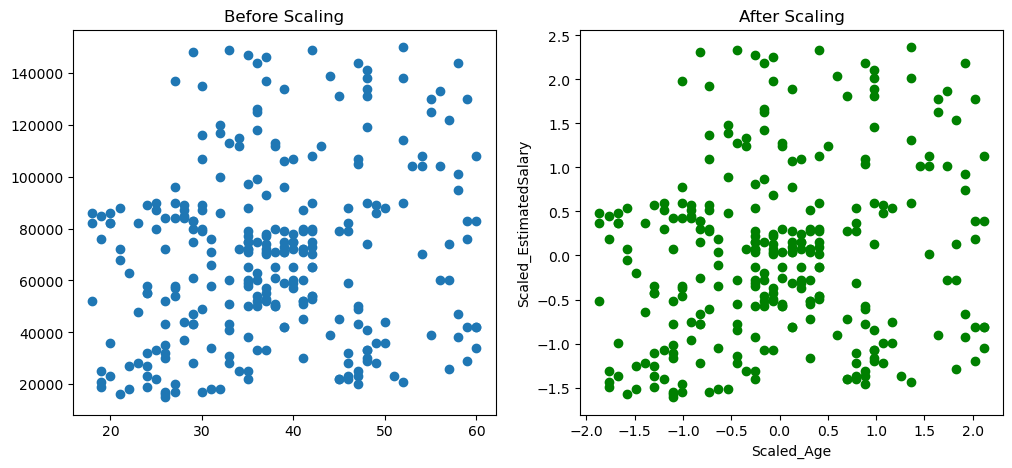

In [37]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'green')
ax2.set_title("After Scaling")
plt.xlabel("Scaled_Age")
plt.ylabel("Scaled_EstimatedSalary")
plt.show()

#### PDF graph : 

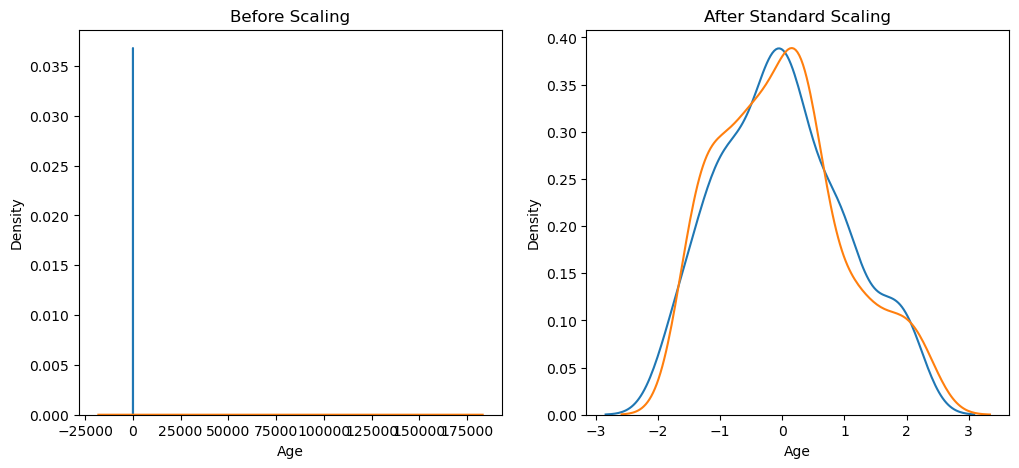

In [38]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### Comparison of Distributions

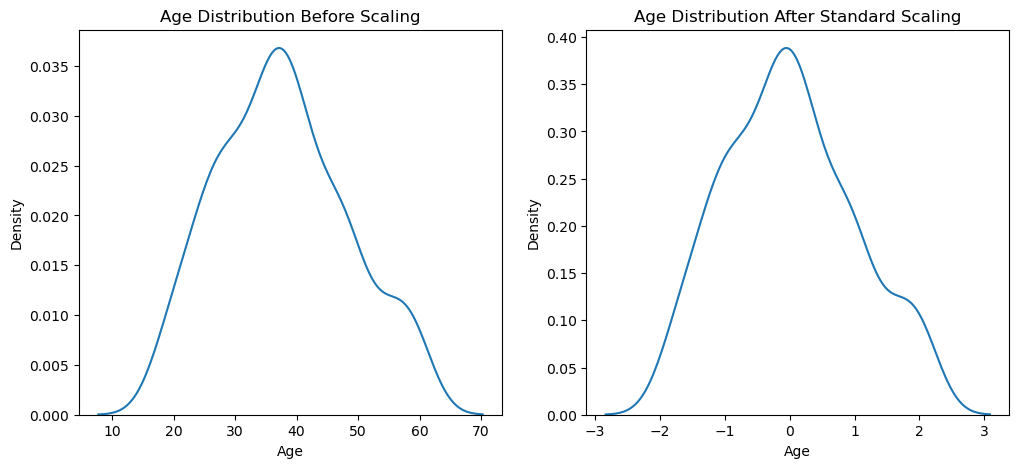

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

#### NOTE : Distribution of individual column doesnot changes after scaling, but distribution between 2 columns may change

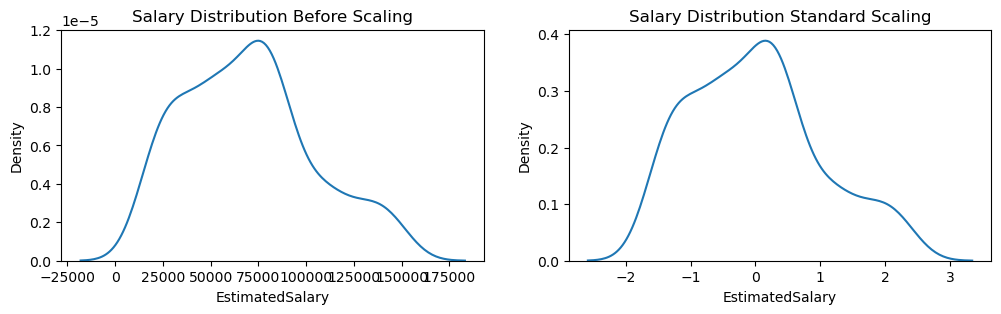

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### Why scaling is Important

__For LogisticRegression Scaling is important__

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr = LogisticRegression()

In [70]:
lr.fit(X_train,y_train) # unscaled data
y_pred = lr.predict(X_test)


lr.fit(X_train_scaled,y_train) # scaled data
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
print("Accuracy of Actual(Unscaled) data: ",accuracy_score(y_test,y_pred)*100,"%")
print(f"Accuracy of Scaled data  is {accuracy_score(y_test,y_pred_scaled)*100}% : ")

Accuracy of Actual(Unscaled) data:  82.5 %
Accuracy of Scaled data  is 81.66666666666667% : 


__For Decision Tree Scaling is not that important__

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [49]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [50]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [51]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.85
Scaled 0.8416666666666667


In [53]:
np.round(df.describe(),2)

Age  EstimatedSalary  Purchased
count  400.00           400.00     400.00
mean    37.66         69742.50       0.36
std     10.48         34096.96       0.48
min     18.00         15000.00       0.00
25%     29.75         43000.00       0.00
50%     37.00         70000.00       0.00
75%     46.00         88000.00       1.00
max     60.00        150000.00       1.00

### Effects of Outliers

In [74]:
# Manually adding Outliers

df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)
df.shape

C:\Users\Asus\AppData\Local\Temp\ipykernel_18756\264586014.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


(403, 3)

In [75]:
np.round(df.describe(),2)

Age  EstimatedSalary  Purchased
count  403.00           403.00     403.00
mean    37.85         70714.64       0.36
std     11.26         37959.79       0.48
min      5.00          1000.00       0.00
25%     29.50         43000.00       0.00
50%     37.00         70000.00       0.00
75%     46.00         88000.00       1.00
max     95.00        350000.00       1.00

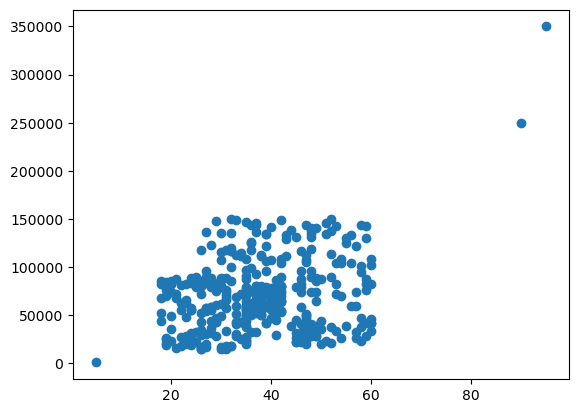

In [76]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((282, 2), (121, 2), (282,), (121,))

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

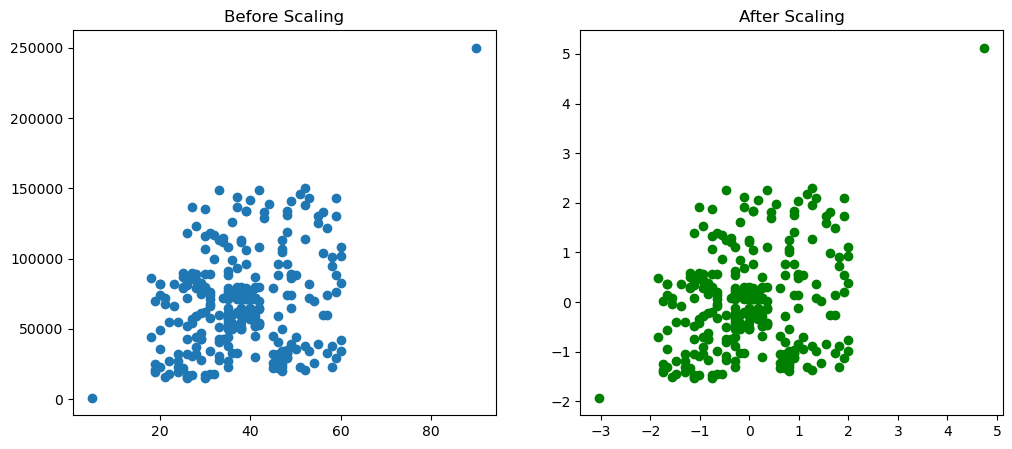

In [80]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='green')
ax2.set_title("After Scaling")
plt.show()

### NOTE : 

__Standard Scaling doesnot effects the Outliers. Relationship between the Outliers and the data still remain the same.__

# 2. Normalization

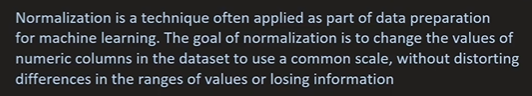


“Normalizing” a vector most often means dividing by a norm of the vector. It also often refers to rescaling by the minimum and range of the vector, to make all the elements lie between 0 and 1 thus bringing all the values of numeric columns in the dataset to a common scale.

### Types of Normlization:


1. MinMax Scaling


2. Robust Scaling


3. Max absolute scaling


4. Mean Normalization


# 2.1 Minmax Scaling

Normalization is a data pre-processing technique used in machine learning to adjust the values
of numeric columns in the dataset to a common scale, without distorting differences in the
ranges of values or losing information. 


Unlike standardization, which rescales data to have a
mean of 0 and a standard deviation of 1, normalization typically rescales the data into the
range between 0 and 1. This process is important for modeling algorithms that are sensitive to
the scale of input features.

$$ x_{i}^{'}\;=\;\frac{x_{i}- x_{min}}{x_{max} - x_{min}} $$

The range of Scaled data will be between __[0,1]__

1. __Fixed Range :__ After applying Min-Max scaling, all feature values are transformed to
lie within a predefined range, typically [0, 1]. If X is a feature, the transformed
value ′X′will be in the range where the minimum value of the feature becomes 0,
and the maximum value becomes 1.


2. __Relative Distances Preserved :__ The relative distances between values in each
feature are preserved. While the absolute values change to fit within the new
range, the proportions relative to the minimum and maximum of the original data
are maintained.


3. __No Impact on Shape of the Data Distribution :__ Min-Max scaling does not alter the
shape of the feature's distribution. If the original data is normally distributed,
skewed, or has any other distribution, the scaled data will maintain that
distribution, albeit within the new range.


4. __Dependency on Min and Max Values :__ The scaled values are highly sensitive to the
minimum and maximum values in the data. If there are outliers, they will
compress the rest of the data into a very small portion of the range, potentially
reducing the effectiveness of the scaling.


5. __Zero Values Transformation :__ If the original data contains zero values, they may no
longer be zero after scaling unless the minimum value in the original data is 0. The
transformation shifts all values proportionally between the new minimum and
maximum.


6. __Impact on Algorithms :__ Min-Max scaling can significantly impact the performance
of machine learning algorithms that are sensitive to the magnitude of the input
values, such as gradient descent-based algorithms, nearest neighbors, and neural
networks. The scaling ensures that features contribute equally to the model's
learning process, preventing features with larger scales from dominating the
learning.


7. __Reversibility :__ The Min-Max scaling process is reversible. Given the scaled value,
along with the original minimum and maximum, you can calculate the original
value. This is important for interpreting model outputs in the original scale.

In [81]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()

Class label  Alcohol  Malic acid
0            1    14.23        1.71
1            1    13.20        1.78
2            1    13.16        2.36
3            1    14.37        1.95
4            1    13.24        2.59

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

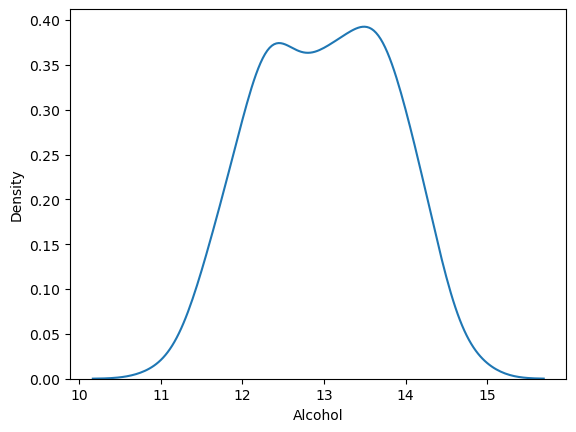

In [82]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

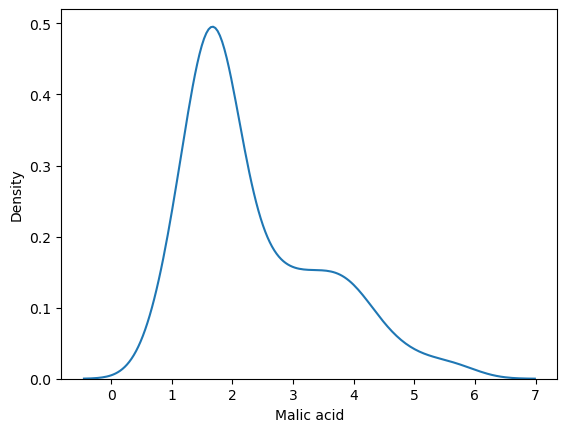

In [83]:
sns.kdeplot(df['Malic acid'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

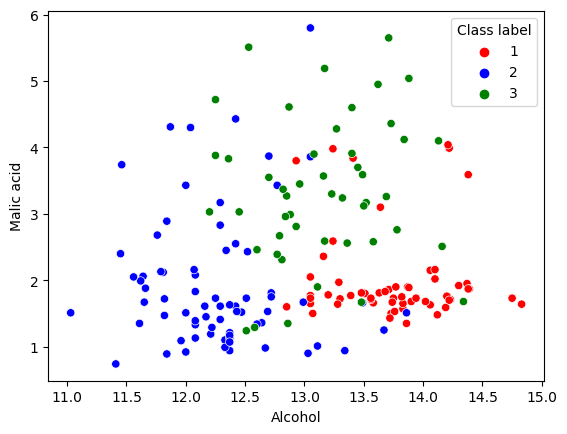

In [84]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [85]:
X = df.iloc[:,1:]
y = df.iloc[:,-1]

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 2), (54, 2), (124,), (54,))

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [91]:
# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [94]:
np.round(X_train.describe(), 2)

Alcohol  Malic acid
count   124.00      124.00
mean     12.98        2.38
std       0.80        1.14
min      11.03        0.89
25%      12.36        1.61
50%      13.04        1.88
75%      13.64        3.25
max      14.75        5.65

In [95]:
np.round(X_train_scaled.describe(), 2)

Alcohol  Malic acid
count   124.00      124.00
mean      0.53        0.31
std       0.22        0.24
min       0.00        0.00
25%       0.36        0.15
50%       0.54        0.21
75%       0.70        0.50
max       1.00        1.00

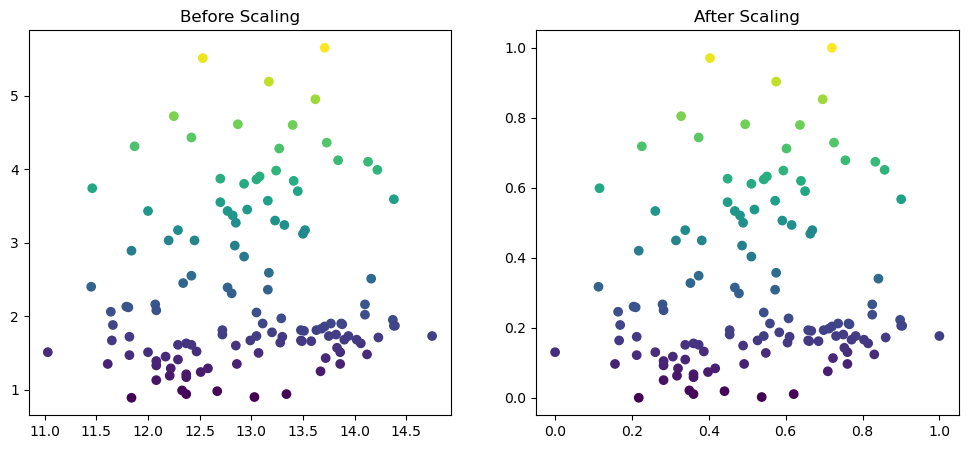

In [96]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

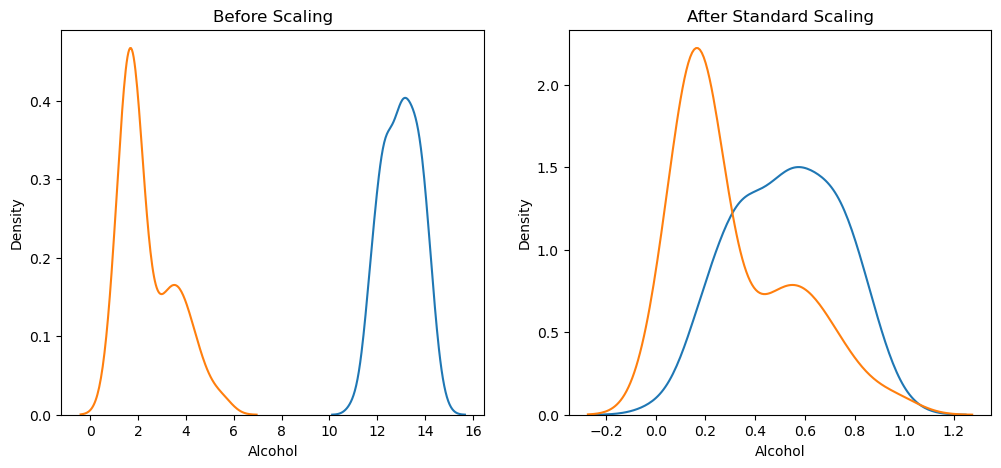

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

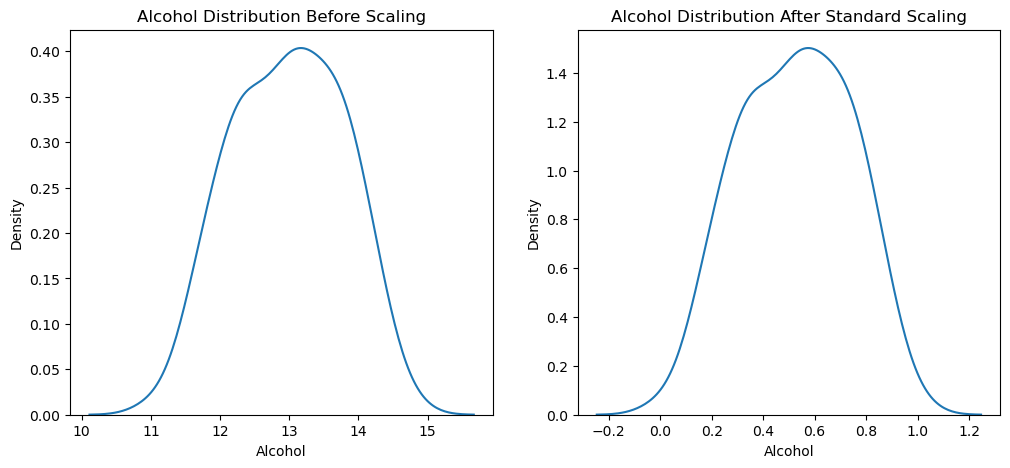

In [98]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

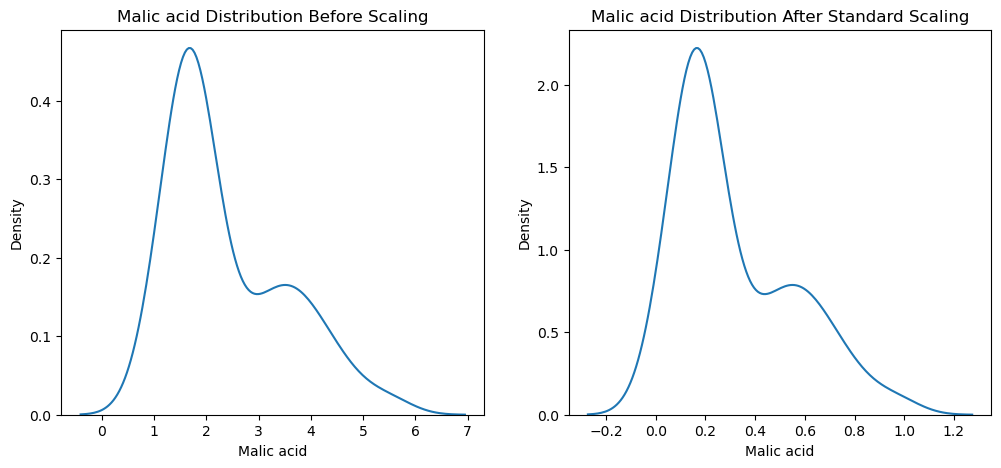

In [99]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

### Note: Impact of Outliers will be there

# Standardization vs Minmax Normalization

### Use Standardization when:


1. Dealing with algos that benefit from data centered around 0


2. Features are normally distributed


3. Algos which want mean centered data. eg : Linear regression, PCA etc

### Use Normalization when:


1. When there is a bounded scale for features. Like you know the range limit of the data. eg:image data


2. When data does not exhibit strong normal distribution


3. When working with algo which don’t work with negative values. eg : Naive Bayes

___When in Doubt, Experiment:___ Sometimes the theoretical best choice may not yield the best
practical results due to the nuances of your specific dataset. Try both standardization and
normalization, and use cross-validation to see which preprocessing technique works better for
your model and data.

# 2.2. Robust Scaling : Robust to Outliers

Scaling using median and quantiles consists of subtracting the median to all the observations and then dividing by the interquartile difference. It Scales features using statistics that are robust to outliers.


$$ x_{i}^{'}\;=\;\frac{x_{i}- x_{median}}{IQR} $$

where $IQR\;=\;75^{th}\;percentile\;\;- \;\;25^{th}\;percentile$ 


#### Advantage

- __Robust to Outliers__


- We use median instead of mean as mean is heavily influenced by outliers.

1. __Median Centering :__ The median of each feature will be shifted to zero. Since the
robust scaler subtracts the median from each data point, the center of the scaled
data for any feature will be its median, aligning it at 0 in the scaled dataset.


2. __IQR Scaling :__ The IQR (the range between the 25th and 75th percentiles) becomes
the scaling reference, set to 1. This means that the difference between the first
quartile (Q1) and the third quartile (Q3) in the scaled data will be 1. Consequently,
data points that were at Q1 and Q3 in the original data will be at -1 and 1,
respectively, in the scaled data.


3. __Outlier Influence Minimization :__ The scaling is less sensitive to outliers compared
to methods like standardization or min-max scaling. Since the median and IQR are
more robust against outliers, extreme values have less influence on the scaling
process, ensuring that the core data is not skewed by anomalous points.


4. __Data Distribution Shape :__ The overall shape of the data distribution is maintained.
While the scale and location of the data change, the relative positioning of data
points within the distribution remains constant.


5. __No Fixed Range for Scaled Data :__ Unlike min-max scaling, the robust scaler does
not confine the data to a fixed range. Scaled values can be greater than 1 or less
than -1, especially for data points that lie outside the interquartile range.


6. __Impact on Learning Algorithms :__ Scaling data with a robust scaler can improve the
performance of machine learning algorithms sensitive to outliers. By ensuring that
the feature’s core data is effectively normalized, models can focus on the more
representative part of the data.


7. __Reversibility :__ The transformation is reversible, provided that you retain the
original median and IQR values. Knowing these parameters allows you to
reconstruct the original data values from the scaled data.

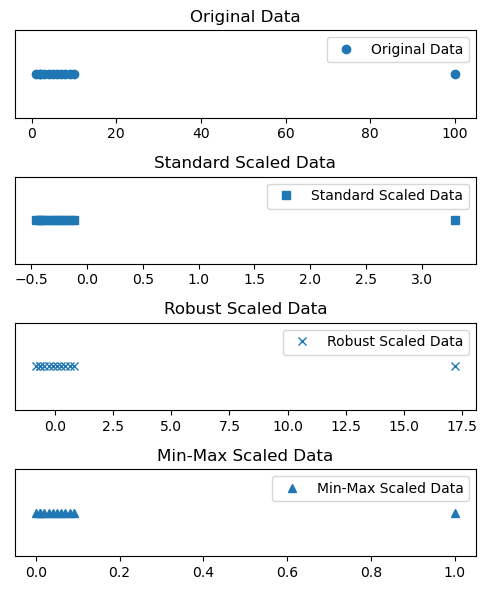

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

# Generating a simple dataset with an outlier
data = np.array([1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]).reshape(-1, 1)

# Applying StandardScaler
standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(data)

# Applying RobustScaler
robust_scaler = RobustScaler()
data_robust_scaled = robust_scaler.fit_transform(data)

# Applying MinMaxScaler
minmax_scaler = MinMaxScaler()
data_minmax_scaled = minmax_scaler.fit_transform(data)

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(5, 6))

# Original Data
axs[0].plot(data, np.zeros_like(data), 'o', label='Original Data')
axs[0].set_yticks([])
axs[0].set_title("Original Data")
axs[0].legend()

# Standard Scaled Data
axs[1].plot(data_standard_scaled, np.zeros_like(data_standard_scaled), 's', label='Standard Scaled Data')
axs[1].set_yticks([])
axs[1].set_title("Standard Scaled Data")
axs[1].legend()

# Robust Scaled Data
axs[2].plot(data_robust_scaled, np.zeros_like(data_robust_scaled), 'x', label='Robust Scaled Data')
axs[2].set_yticks([])
axs[2].set_title("Robust Scaled Data")
axs[2].legend()

# Min-Max Scaled Data
axs[3].plot(data_minmax_scaled, np.zeros_like(data_minmax_scaled), '^', label='Min-Max Scaled Data')
axs[3].set_yticks([])
axs[3].set_title("Min-Max Scaled Data")
axs[3].legend()

plt.tight_layout()
plt.show()


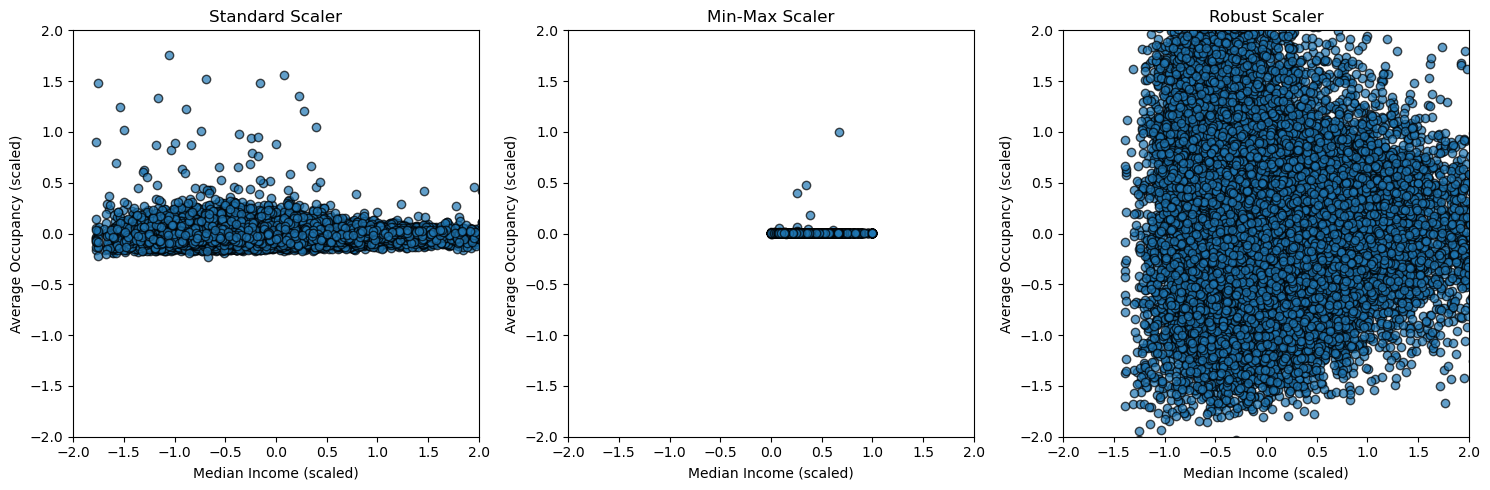

In [50]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Fetching the California housing dataset
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

# Selecting the features "MedInc" and "AveOccup"
features = ["MedInc", "AveOccup"]
features_idx = [feature_names.index(feature) for feature in features]
X = X_full[:, features_idx]

# Scaling the data using Standard Scaler, Min-Max Scaler, and Robust Scaler
scalers = {
    'Standard Scaler': StandardScaler(),
    'Min-Max Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}

# Plotting the original and scaled data
plt.figure(figsize=(15, 5))
for i, (name, scaler) in enumerate(scalers.items(), 1):
    X_scaled = scaler.fit_transform(X)

    plt.subplot(1, 3, i)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], edgecolor='k', alpha=0.7)
    plt.title(f'{name}')
    plt.xlabel('Median Income (scaled)')
    plt.ylabel('Average Occupancy (scaled)')
    plt.xlim(-2, 2)  # Limiting x-axis to exclude outliers
    plt.ylim(-2, 2)  # Limiting y-axis to exclude outliers

plt.tight_layout()
plt.show()


##### Distibution of a column doenot changes after applying Robust Scaling :

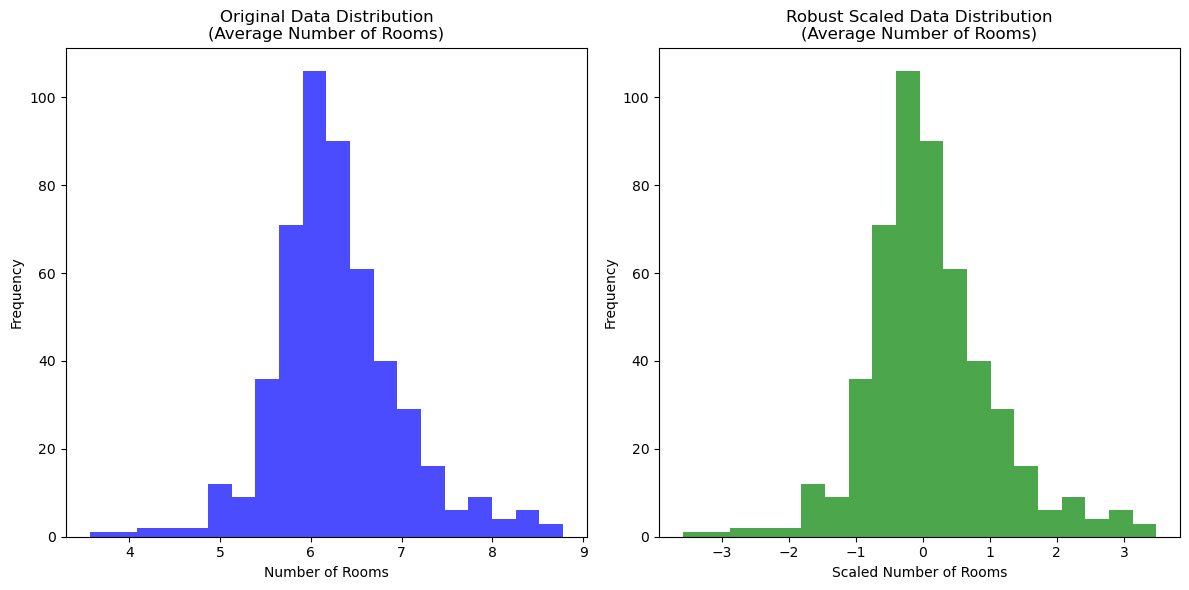

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Select a single feature for demonstration, for example, 'rm' (average number of rooms per dwelling)
feature_data = df['rm'].values

# Apply RobustScaler to the selected feature
scaler = RobustScaler()
feature_scaled = scaler.fit_transform(feature_data.reshape(-1, 1)).flatten()

# Plotting the original and scaled data distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(feature_data, bins=20, color='blue', alpha=0.7)
plt.title('Original Data Distribution\n(Average Number of Rooms)')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(feature_scaled, bins=20, color='green', alpha=0.7)
plt.title('Robust Scaled Data Distribution\n(Average Number of Rooms)')
plt.xlabel('Scaled Number of Rooms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# 2.3. Max Absolute Scaling (very less used)

$$x_{i}^{'}\;=\;\frac{x_{i}}{|x_{max}|}$$


#### sklearn class is MaxAbsScaler


#### mostly used for:

- Sparse data (data with too many 0's)

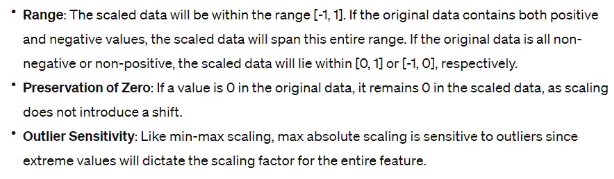

1. __Sign Preservation :__ The scaling maintains the sign of each value. Positive values
remain positive, and negative values stay negative, ensuring that the relative
relationships in terms of direction (positive or negative) are preserved.


2. __Zero Values :__ Zero values in the data remain unchanged. This characteristic is
crucial for datasets where the zero point carries specific meaning or indicates the
absence of a feature.


3. __Relative Distances :__ The relative distances between values in each feature are
preserved. While the scale changes, the proportional relationships between data
points remain consistent.


4. __Outlier Sensitivity :__ The scaling process is sensitive to outliers. Extreme values can
dominate the scaling factor, affecting how the rest of the data is scaled.


5. __No Centering :__ The data is not centered around the mean or median; only the
scale changes. The center of the distribution remains the same as in the original
data.


6. __Dimensional Consistency :__ Each feature is scaled independently, ensuring that the
scaling does not distort the relationships between different features in
multivariate data.


7. __Sparse Data Suitability :__ The method is particularly suitable for sparse data, as it
does not alter zero entries, maintaining the sparsity pattern of the dataset.


8. __Scale Interpretation :__ Post-scaling, the interpretation of a unit change in the data is
consistent across features, facilitating comparisons and analyses that rely on the
magnitude of values.


9. __Reversibility :__ The scaling transformation is reversible. Knowing the original
maximum absolute value allows you to rescale the data back to its original range,
preserving the integrity of the data for inverse transformations if needed.

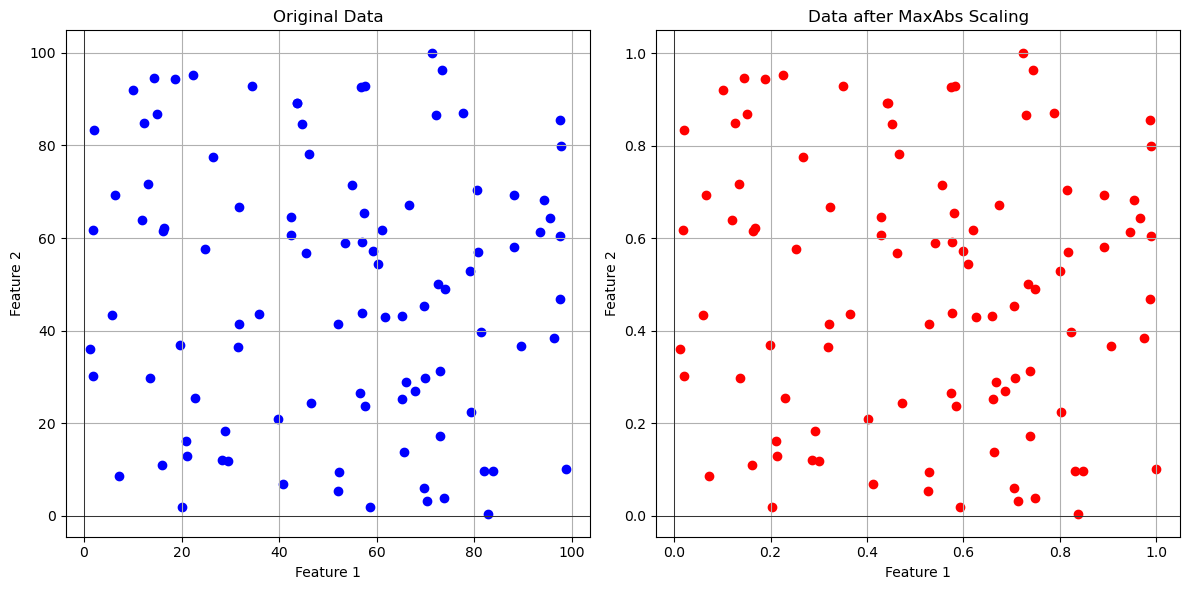

In [52]:
from sklearn.preprocessing import MaxAbsScaler

# Generating a toy dataset with 100 rows and 2 features
np.random.seed(0)  # For reproducibility
X_toy = np.random.rand(100, 2) * 100  # Random values between 0 and 100

# Applying MaxAbsScaler
max_abs_scaler = MaxAbsScaler()
X_toy_scaled = max_abs_scaler.fit_transform(X_toy)

# Plotting the original and scaled data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Original Data
ax1.scatter(X_toy[:, 0], X_toy[:, 1], color='blue')
ax1.set_title('Original Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.grid(True)

# Scaled Data
ax2.scatter(X_toy_scaled[:, 0], X_toy_scaled[:, 1], color='red')
ax2.set_title('Data after MaxAbs Scaling')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.grid(True)

plt.tight_layout()
plt.show()


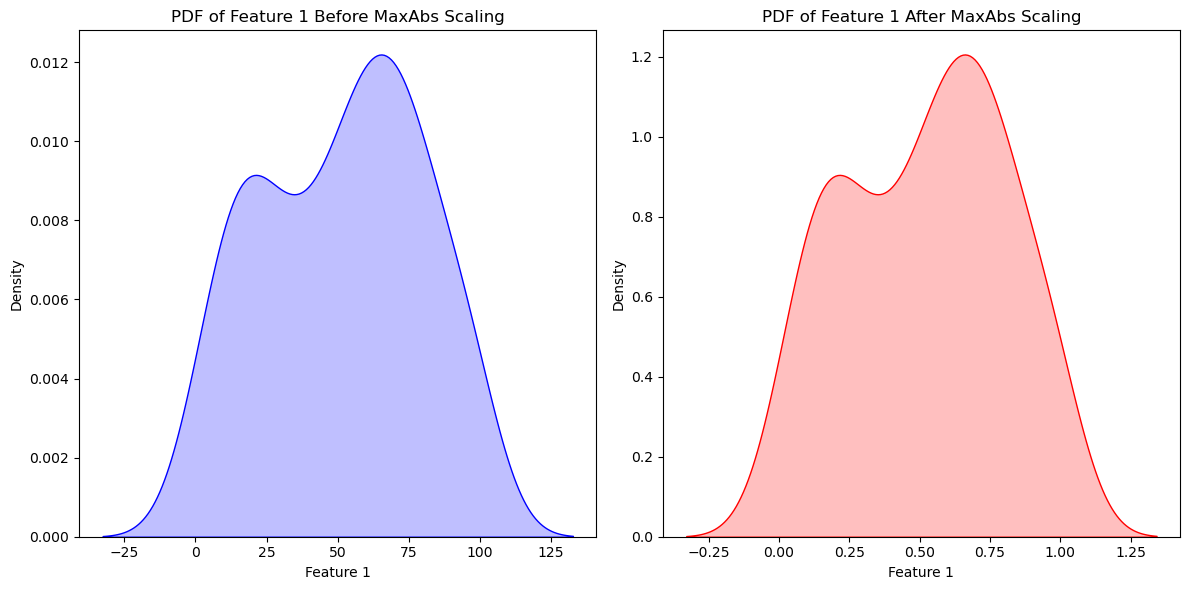

In [53]:
import seaborn as sns

# Setting up the figure
plt.figure(figsize=(12, 6))

# Plotting the PDF of Feature 1 before scaling
plt.subplot(1, 2, 1)
sns.kdeplot(X_toy[:, 0], shade=True, color="blue")
plt.title('PDF of Feature 1 Before MaxAbs Scaling')
plt.xlabel('Feature 1')
plt.ylabel('Density')

# Plotting the PDF of Feature 1 after scaling
plt.subplot(1, 2, 2)
sns.kdeplot(X_toy_scaled[:, 0], shade=True, color="red")
plt.title('PDF of Feature 1 After MaxAbs Scaling')
plt.xlabel('Feature 1')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


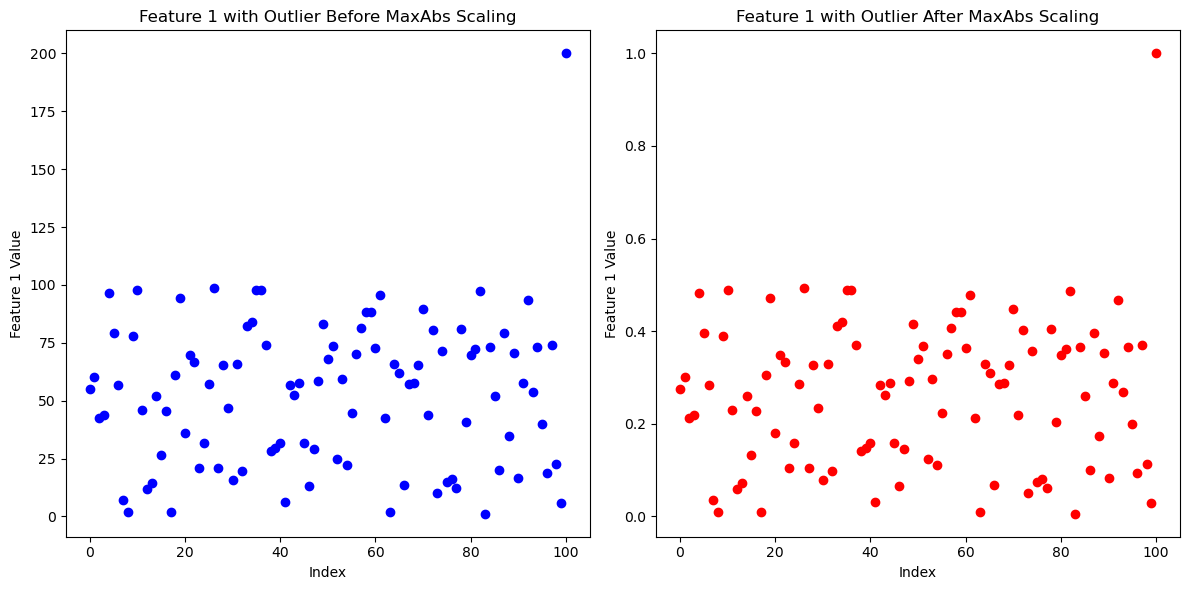

In [54]:
# Adding a significant outlier to the dataset
X_toy_outlier = np.append(X_toy, [[200, 50]], axis=0)  # Adding an outlier to Feature 1

# Applying MaxAbsScaler to the dataset with the outlier
X_toy_outlier_scaled = max_abs_scaler.fit_transform(X_toy_outlier)

# Setting up the figure for scatter plots with an outlier
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for Feature 1 with outlier before scaling
axes[0].scatter(range(len(X_toy_outlier)), X_toy_outlier[:, 0], color="blue")
axes[0].set_title('Feature 1 with Outlier Before MaxAbs Scaling')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Feature 1 Value')

# Scatter plot for Feature 1 with outlier after scaling
axes[1].scatter(range(len(X_toy_outlier_scaled)), X_toy_outlier_scaled[:, 0], color="red")
axes[1].set_title('Feature 1 with Outlier After MaxAbs Scaling')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Feature 1 Value')

plt.tight_layout()
plt.show()


# 2.4. Mean Normalization : mean centering

$$ x_{i}^{'}\;=\;\frac{x_{i}- x_{mean}}{x_{max} - x_{min}} $$

#### range will be [-1, 1]

##### rarely used, sklearn doesnot have code for it

# Types of Scaling

1. **Univariate :** Scaling is done for each __column wise__ seperately based on that particular column. eg : StandardScaler, MinMax Scaler, Robust Scaler, Absolute Scaler.



2. **Multivariate :** Scaling is done based on entire dataset i.e __row wise__ scaling is done

### Univariate

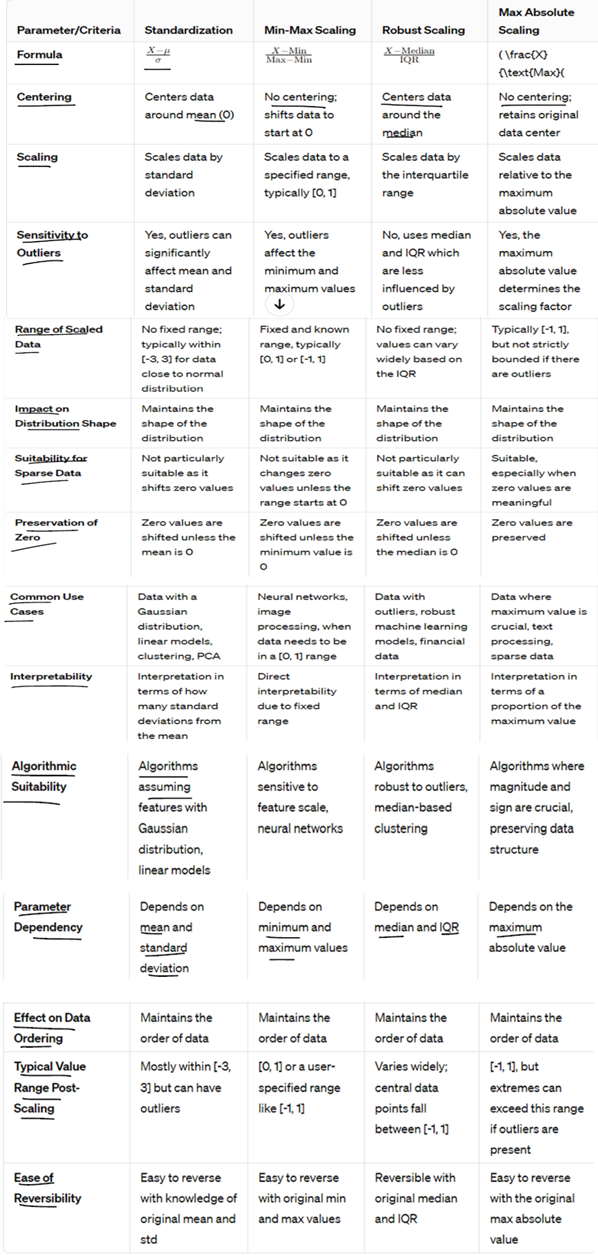

# 2.5. L2 /L1 Normalization -> row is more important than columns

L1 and L2 normalization are techniques used to scale feature vectors in machine learning. They are used to ensure that the feature vectors have a certain norm or length, which can be beneficial for various algorithms.


__Scaling is done on each row individually. It is not done Column wise__

### 1. L1 Normalization :

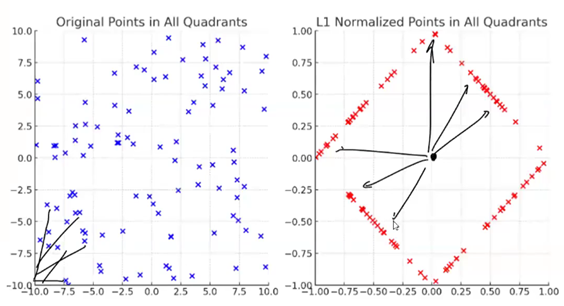

   - Also known as __least absolute deviations or Manhattan norm__, L1 normalization scales each feature vector such that the sum of the __absolute values of its components is equal to 1.__<br></br>
   - Mathematically, L1 normalization of a feature vector $\mathbf{x}$ with (n) components is calculated as follows:<br></br>
     $\text{L1-norm}(\mathbf{x}) = \frac{\mathbf{x}}{\| \mathbf{x} \|_1}$<br></br>
     Where $| \mathbf{x} \|_1$ represents the L1 norm of $\mathbf{x}$, which is the __sum of the absolute values of its components.__<br></br>
   - __we divide each row with their respective ||x|| = $|x_1| + |x_2|....|x_n|$__.<br></br>
   - L1 normalization ensures that the sum of the absolute values of the components of the vector is 1, which can be useful for algorithms that are sensitive to the scale of features.
   
   
> ___After applying L1 Norm to different vectors, the new formed vectors will have distance from origin = 1 i.e. magnitude of new vectors is 1___

### 2. L2 Normalization:

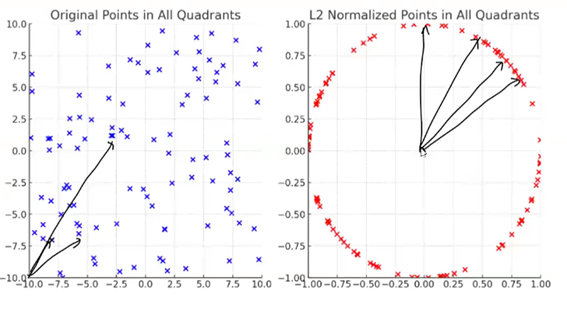

   - Also known as __least squares or Euclidean norm__, L2 normalization scales each feature vector such that the __Euclidean (L2) norm of the vector is equal to 1.__
   - Mathematically, L2 normalization of a feature vector \( \mathbf{x} \) with \( n \) components is calculated as follows:<br></br>
     $\text{L2-norm}(\mathbf{x}) = \frac{\mathbf{x}}{\| \mathbf{x} \|_2}$<br></br>
     Where $\| \mathbf{x} \|_2$ represents the L2 norm of $\mathbf{x}$, which is the __square root of the sum of the squares of its components__<br></br>
   - we divide each row with their respective __||x|| = $\sqrt{{x_1}^2 + {x_2}^2....{x_n}^2}$__.<br></br>
   - L2 normalization ensures that the Euclidean distance from the origin to the vector is 1, which can be beneficial for algorithms that rely on distance measures.
   
> ___After applying L2 Norm to different vectors, the new formed vectors will have distance from origin = 1 i.e. magnitude of new vectors is 1___

To calculate the L1 or L2 norm of a vector, you sum the absolute values (for L1 norm) or the squares of the values (for L2 norm) of its components and then take the square root (for L2 norm). These normalized vectors can then be used as input for various machine learning algorithms.

### Use-case


1. Where row data is more important than column data. eg:Text Preprocessing -> sparse features -> L1


2. Similarity based algos [cosine similarity] -> __Recommender system__


3. Image processing based applications


4. Neural network embeddings

In [1]:
import numpy as np
from sklearn.preprocessing import normalize

# Generating a toy dataset with 100 rows and 2 features
np.random.seed(0)  # For reproducibility
X_toy = np.random.rand(100, 2) * 100  # Random values between 0 and 100

# Applying L2 normalization
X_l2_normalized = normalize(X_toy, norm='l2')

# Applying L1 normalization
X_l1_normalized = normalize(X_toy, norm='l1')

# Displaying the first 5 rows of the original and normalized data for comparison
original_data = X_toy[:5]
l2_data = X_l2_normalized[:5]
l1_data = X_l1_normalized[:5]

(original_data, l2_data, l1_data)


(array([[54.88135039, 71.51893664],
        [60.27633761, 54.4883183 ],
        [42.36547993, 64.58941131],
        [43.75872113, 89.17730008],
        [96.36627605, 38.34415188]]),
 array([[0.60878196, 0.79333759],
        [0.74182603, 0.67059238],
        [0.54846349, 0.8361745 ],
        [0.44051722, 0.89774416],
        [0.92914796, 0.36970808]]),
 array([[0.43418691, 0.56581309],
        [0.52521691, 0.47478309],
        [0.39610605, 0.60389395],
        [0.32917129, 0.67082871],
        [0.7153587 , 0.2846413 ]]))

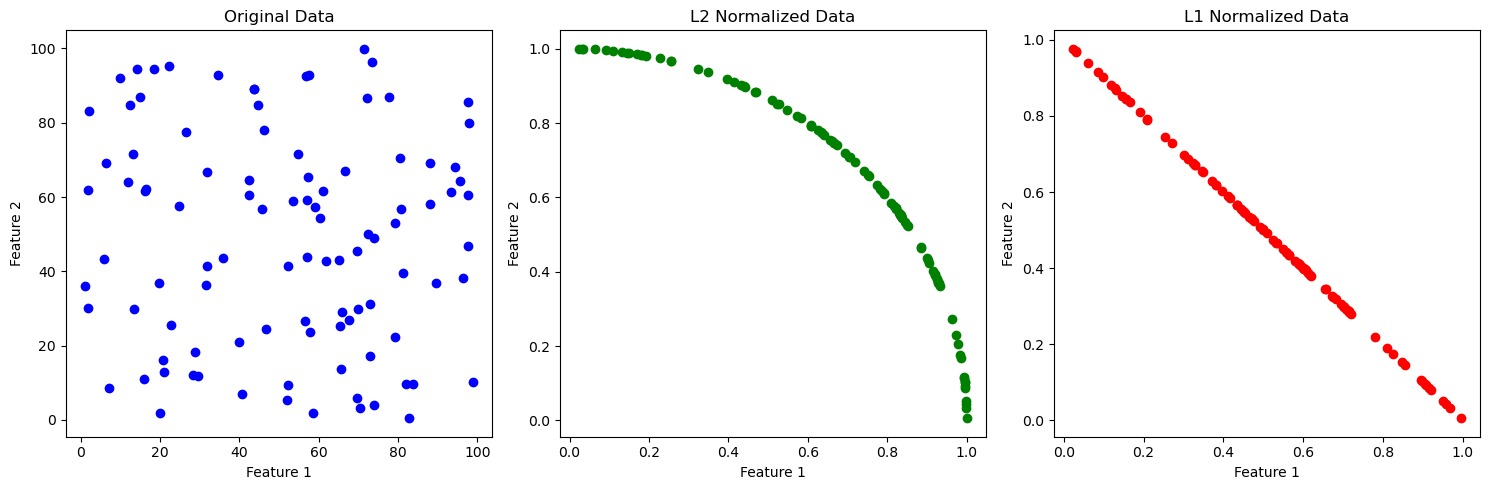

In [2]:
import matplotlib.pyplot as plt

# Plotting the original, L2 normalized, and L1 normalized data

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original Data
ax[0].scatter(X_toy[:, 0], X_toy[:, 1], color='blue')
ax[0].set_title('Original Data')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# L2 Normalized Data
ax[1].scatter(X_l2_normalized[:, 0], X_l2_normalized[:, 1], color='green')
ax[1].set_title('L2 Normalized Data')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

# L1 Normalized Data
ax[2].scatter(X_l1_normalized[:, 0], X_l1_normalized[:, 1], color='red')
ax[2].set_title('L1 Normalized Data')
ax[2].set_xlabel('Feature 1')
ax[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


#### The distribution of column changes after applying L1 and L2 norm : 

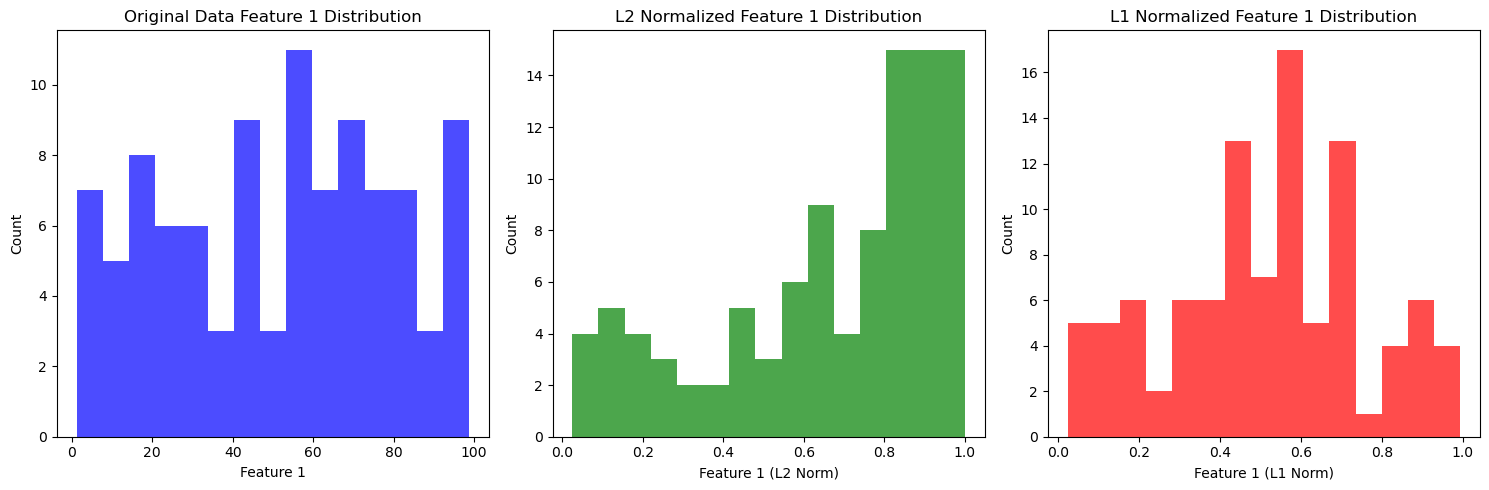

In [3]:
# Plotting the distribution of Feature 1 before and after L2 and L1 normalization

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original Data Feature 1 Distribution
ax[0].hist(X_toy[:, 0], bins=15, color='blue', alpha=0.7)
ax[0].set_title('Original Data Feature 1 Distribution')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Count')

# L2 Normalized Data Feature 1 Distribution
ax[1].hist(X_l2_normalized[:, 0], bins=15, color='green', alpha=0.7)
ax[1].set_title('L2 Normalized Feature 1 Distribution')
ax[1].set_xlabel('Feature 1 (L2 Norm)')
ax[1].set_ylabel('Count')

# L1 Normalized Data Feature 1 Distribution
ax[2].hist(X_l1_normalized[:, 0], bins=15, color='red', alpha=0.7)
ax[2].set_title('L1 Normalized Feature 1 Distribution')
ax[2].set_xlabel('Feature 1 (L1 Norm)')
ax[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


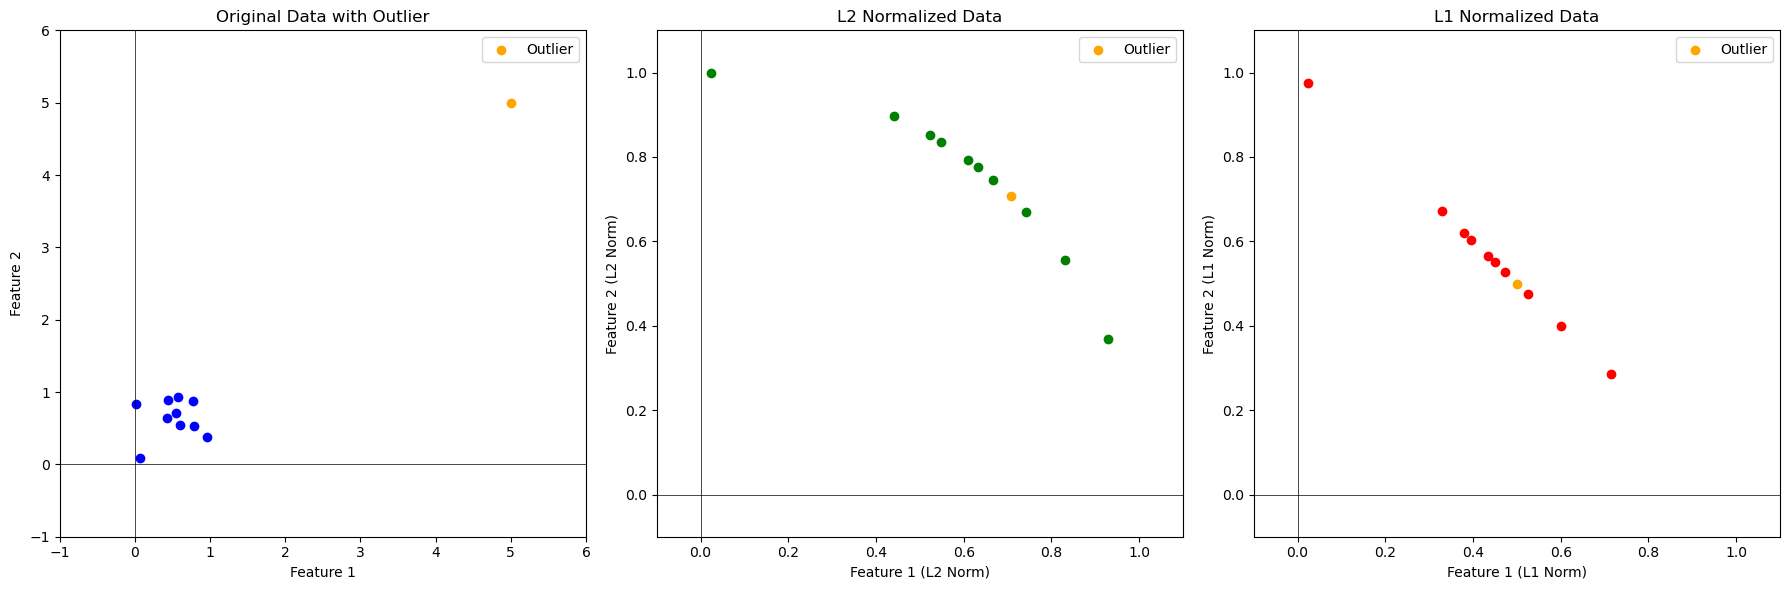

In [4]:
# Creating a new dataset with multiple points and one significant outlier
np.random.seed(0)  # For reproducibility
X_new = np.random.rand(10, 2)  # 10 random points
X_new = np.vstack([X_new, [5, 5]])  # Adding an outlier

# L2 Normalizing the data with the outlier
X_new_l2_normalized = normalize(X_new, norm='l2')

# L1 Normalizing the data with the outlier
X_new_l1_normalized = normalize(X_new, norm='l1')
# Plotting the original, L2 normalized, and L1 normalized data with the outlier highlighted in a different color
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original data with highlighted outlier
axes[0].scatter(X_new[:-1, 0], X_new[:-1, 1], color='blue')
axes[0].scatter(X_new[-1, 0], X_new[-1, 1], color='orange', label='Outlier')
axes[0].set_title('Original Data with Outlier')
axes[0].set_xlim(-1, 6)
axes[0].set_ylim(-1, 6)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].axhline(0, color='black', linewidth=0.5)
axes[0].axvline(0, color='black', linewidth=0.5)
axes[0].legend()

# L2 Normalized data with highlighted outlier
axes[1].scatter(X_new_l2_normalized[:-1, 0], X_new_l2_normalized[:-1, 1], color='green')
axes[1].scatter(X_new_l2_normalized[-1, 0], X_new_l2_normalized[-1, 1], color='orange', label='Outlier')
axes[1].set_title('L2 Normalized Data')
axes[1].set_xlim(-0.1, 1.1)
axes[1].set_ylim(-0.1, 1.1)
axes[1].set_xlabel('Feature 1 (L2 Norm)')
axes[1].set_ylabel('Feature 2 (L2 Norm)')
axes[1].axhline(0, color='black', linewidth=0.5)
axes[1].axvline(0, color='black', linewidth=0.5)
axes[1].legend()

# L1 Normalized data with highlighted outlier
axes[2].scatter(X_new_l1_normalized[:-1, 0], X_new_l1_normalized[:-1, 1], color='red')
axes[2].scatter(X_new_l1_normalized[-1, 0], X_new_l1_normalized[-1, 1], color='orange', label='Outlier')
axes[2].set_title('L1 Normalized Data')
axes[2].set_xlim(-0.1, 1.1)
axes[2].set_ylim(-0.1, 1.1)
axes[2].set_xlabel('Feature 1 (L1 Norm)')
axes[2].set_ylabel('Feature 2 (L1 Norm)')
axes[2].axhline(0, color='black', linewidth=0.5)
axes[2].axvline(0, color='black', linewidth=0.5)
axes[2].legend()

plt.tight_layout()
plt.show()


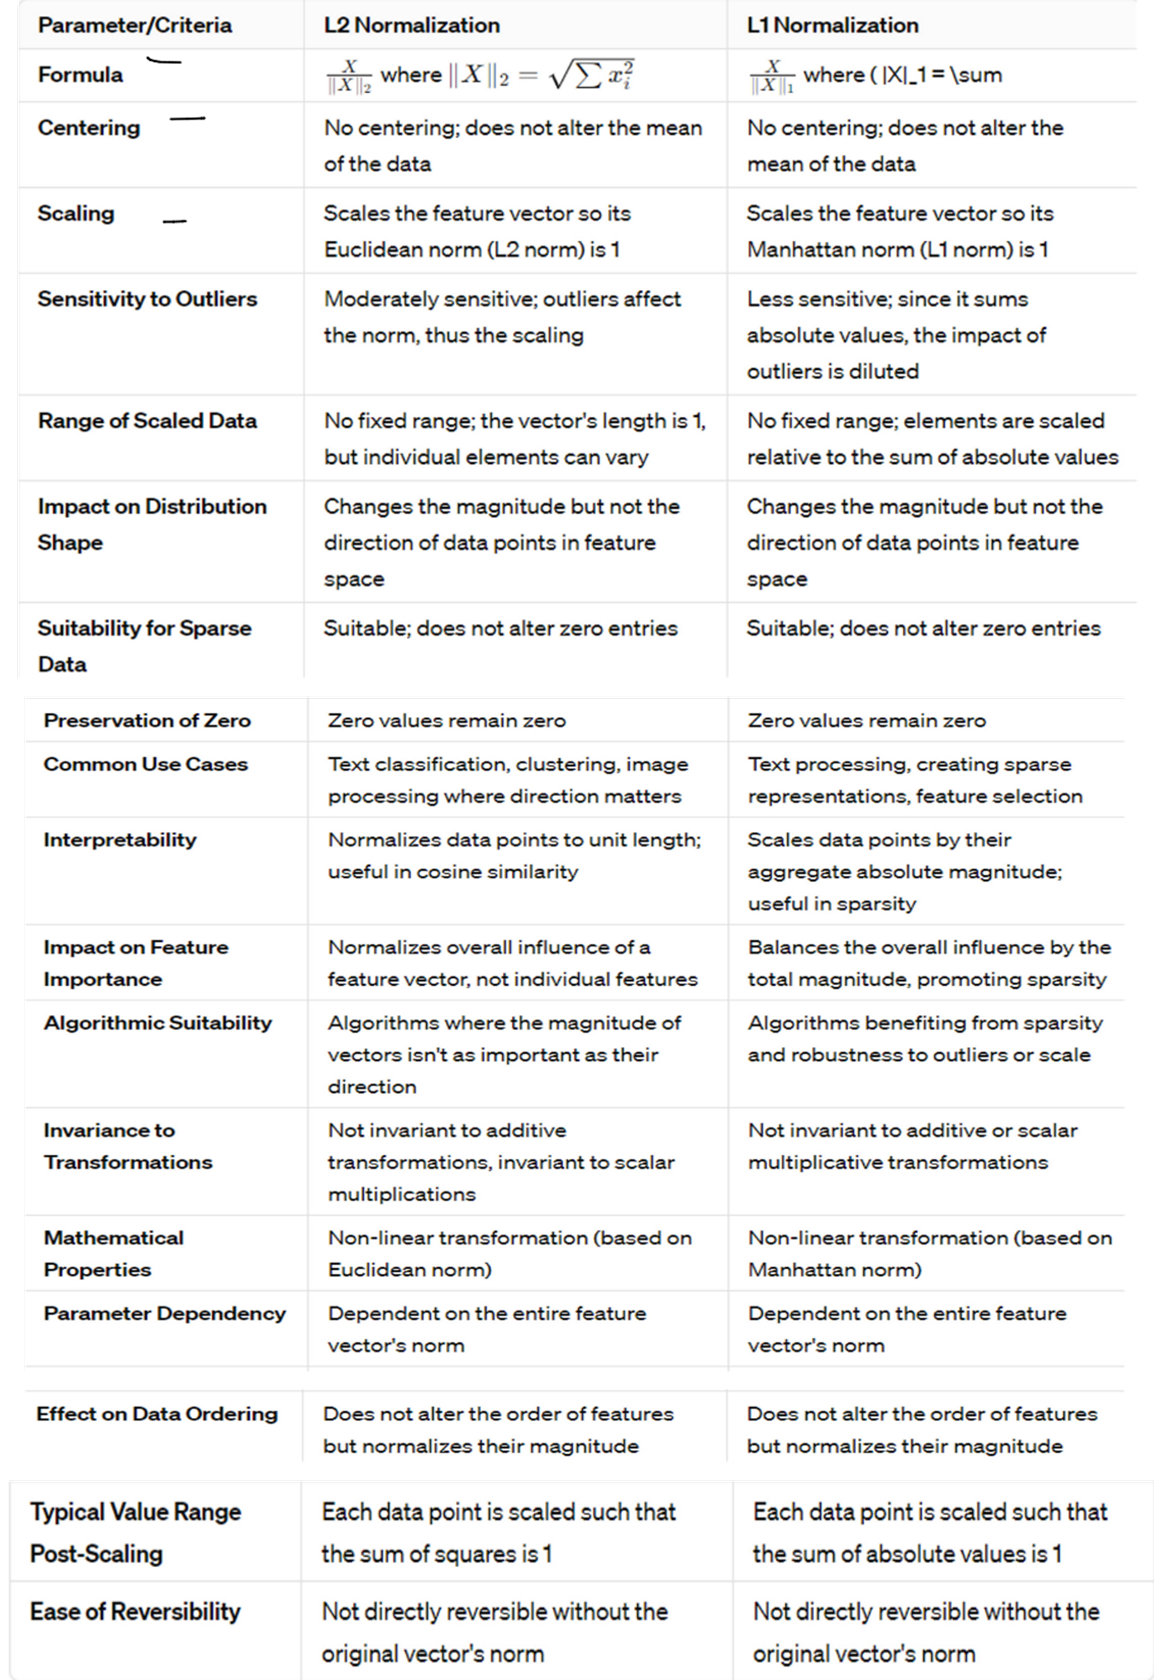

# Normalization VS Standardization

Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve).

Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

Standardization assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

Most of the problems will be solved with Standardization


MinMax Scaler is used when you know the Min and Max of the dataset i.e for Image Processing